# <div> <center> <b> NN Arabic Handwriting Recognition </b> </center> </div>


## Environment Setup:
### Importing Packages

In [101]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Loading the Dataset(s):

In [103]:
datasets = ['/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train',\
            '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test',
           '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset']
NUM_CLASS = 65
IMAGE_SIZE = (160,160)
BATCH_SIZE = 512
SEED = 43
EPOCHS = 50

- There are 65 classes to classify into (0-64)
- Images must be resized to a consistent size in order to train properly.

## [](http://)Data Pre-processing:


In [104]:
train_images = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    color_mode='grayscale',
    label_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)
train_validation = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    label_mode="categorical",
    color_mode='grayscale',
    subset="validation",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 42559 files belonging to 65 classes.
Using 34048 files for training.
Found 42559 files belonging to 65 classes.
Using 8511 files for validation.


## Data Visualization:

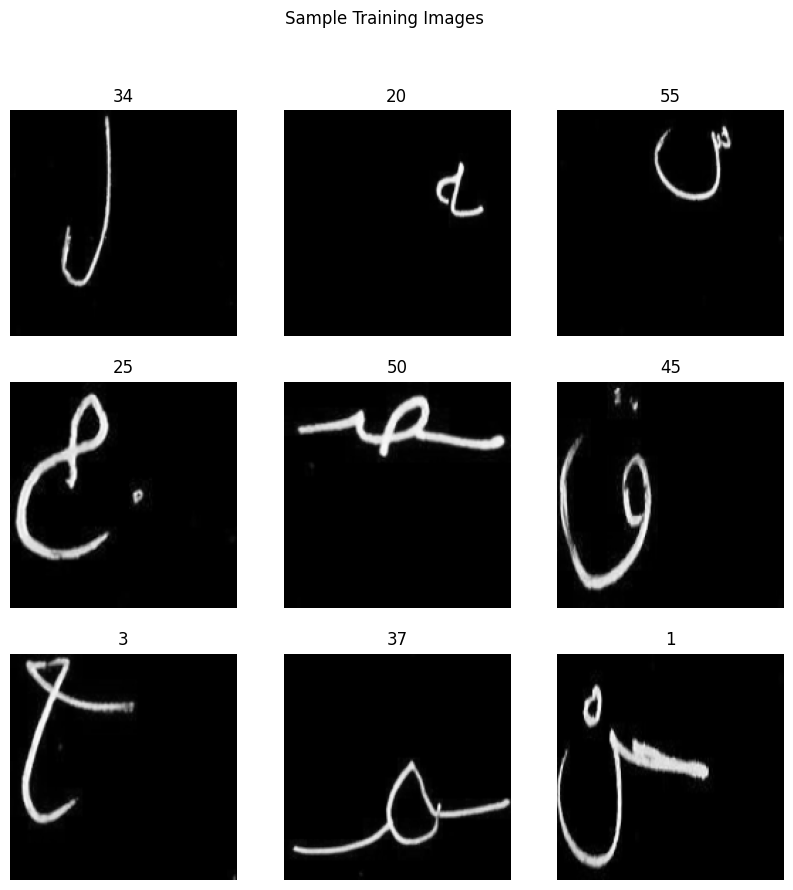

In [105]:

# Function to plot images with provided class names
def plot_images(dataset, class_names, title):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"), cmap='Greys')
            plt.title(class_names[np.argmax(labels[i])])
            plt.axis("off")
    plt.suptitle(title)
    plt.show()

# Call the plotting function
plot_images(train_images, class_names, "Sample Training Images")


In [106]:
for images, labels in train_images:
    print(images.shape)
    print(labels.shape)
    break


(512, 160, 160, 1)
(512, 65)


- (Batch Size, Width, Height, 1 Image Tensor Channel (Greyscale))
- (Batch Size, Number of Classes)

## Model Definition:

In [108]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu',
#                            kernel_regularizer=tf.keras.regularizers.l2(0.001)
                         ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(NUM_CLASS, activation=tf.nn.softmax)
])

### Model Summary:

In [109]:
model.build(input_shape=(BATCH_SIZE, IMAGE_SIZE[0], IMAGE_SIZE[1], 1))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (512, 160, 160, 1)        0         
                                                                 
 random_rotation_10 (Random  (512, 160, 160, 1)        0         
 Rotation)                                                       
                                                                 
 random_zoom_10 (RandomZoom  (512, 160, 160, 1)        0         
 )                                                               
                                                                 
 conv2d_40 (Conv2D)          (512, 160, 160, 32)       320       
                                                                 
 max_pooling2d_40 (MaxPooli  (512, 80, 80, 32)         0         
 ng2D)                                                           
                                                     

### Model Optimization:

In [111]:
learning_rate = 0.001
lr_mod = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, decay_steps=100000,\
                                                             decay_rate=0.96, staircase=True)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_mod), loss = 'categorical_crossentropy', metrics=['accuracy'])

## Training the Model:

In [112]:
h1 = model.fit(
    train_images,
    validation_data=validation_images,  # Use the correct variable name
    epochs=EPOCHS
)


Epoch 1/50
67/67 [==============================] - 31s 397ms/step - loss: 4.1421 - accuracy: 0.0228 - val_loss: 3.9082 - val_accuracy: 0.0663
Epoch 2/50
67/67 [==============================] - 30s 421ms/step - loss: 3.4148 - accuracy: 0.1394 - val_loss: 2.4564 - val_accuracy: 0.3232
Epoch 3/50
67/67 [==============================] - 28s 398ms/step - loss: 2.2070 - accuracy: 0.3816 - val_loss: 1.3188 - val_accuracy: 0.5897
Epoch 4/50
67/67 [==============================] - 29s 410ms/step - loss: 1.4919 - accuracy: 0.5550 - val_loss: 0.9002 - val_accuracy: 0.7175
Epoch 5/50
67/67 [==============================] - 29s 407ms/step - loss: 1.1455 - accuracy: 0.6516 - val_loss: 0.7461 - val_accuracy: 0.7682
Epoch 6/50
67/67 [==============================] - 29s 412ms/step - loss: 0.9584 - accuracy: 0.7062 - val_loss: 0.6350 - val_accuracy: 0.8048
Epoch 7/50
67/67 [==============================] - 29s 406ms/step - loss: 0.8059 - accuracy: 0.7501 - val_loss: 0.5704 - val_accuracy: 0.8249

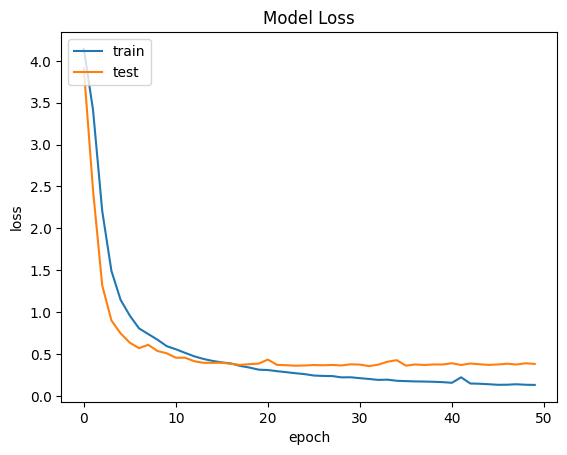

In [113]:
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


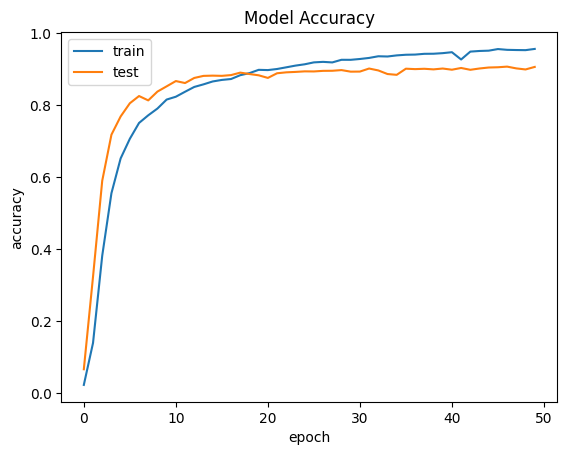

In [114]:
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()